🔹 First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
✅ Model Accuracy: 0.97

=== Classification Report ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



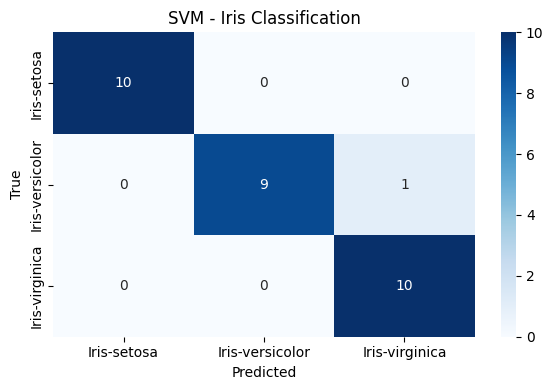

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
print("🔹 First 5 rows of the dataset:")
print(df.head())

# 2) Features / target (explicit, robust)
X = df.drop(columns=["Id", "Species"], errors="ignore")
y = df["Species"]

# 3) Split (stratified + reproducible)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4) Train SVM (reproducible)
model = SVC(kernel="rbf", gamma="scale", C=1.0, random_state=42)
model.fit(X_train, y_train)

# 5) Predict + evaluate
y_pred = model.predict(X_test)
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 6) Confusion matrix (aligned labels)
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=model.classes_, yticklabels=model.classes_
)
plt.title("SVM - Iris Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
